# EDA + DECISION TREE - Diabetes prediction

#### EDA

In [2]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

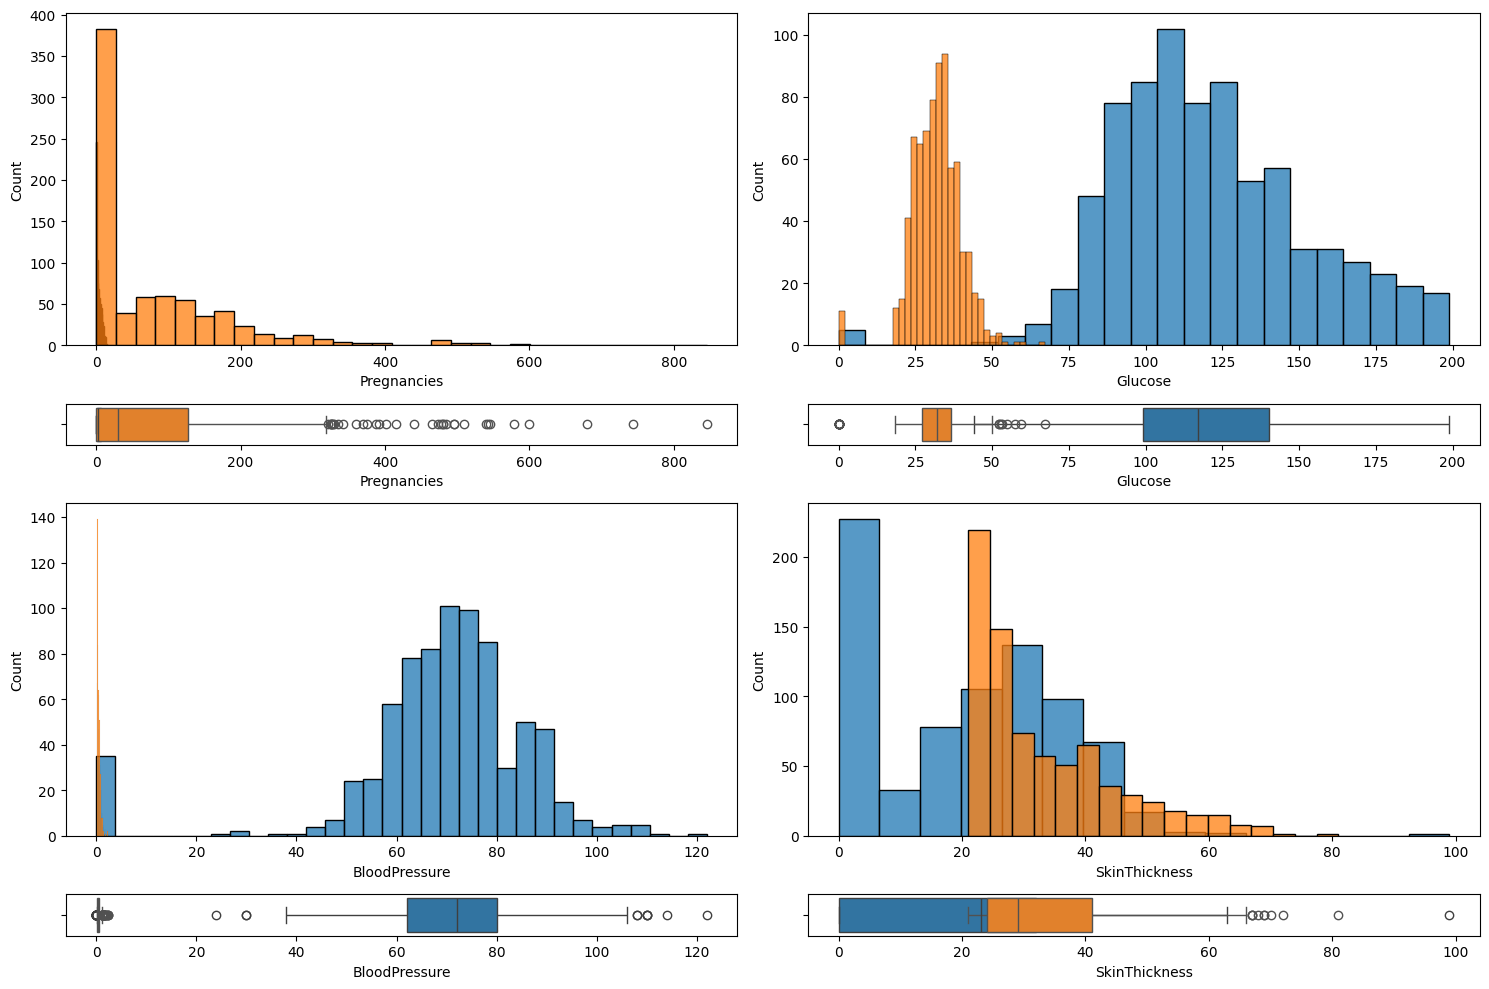

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure
fig, axis = plt.subplots(4, 2, figsize=(15, 10), gridspec_kw={"height_ratios": [8, 1, 8, 1]})

# Histograms and Box plots
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=df, x="Pregnancies")

sns.histplot(ax=axis[0, 1], data=df, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=df, x="Glucose")

sns.histplot(ax=axis[2, 0], data=df, x="BloodPressure")
sns.boxplot(ax=axis[3, 0], data=df, x="BloodPressure")

sns.histplot(ax=axis[2, 1], data=df, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=df, x="SkinThickness")

sns.histplot(ax=axis[0, 0], data=df, x="Insulin")
sns.boxplot(ax=axis[1, 0], data=df, x="Insulin")

sns.histplot(ax=axis[0, 1], data=df, x="BMI")
sns.boxplot(ax=axis[1, 1], data=df, x="BMI")

sns.histplot(ax=axis[2, 0], data=df, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[3, 0], data=df, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[2, 1], data=df, x="Age")
sns.boxplot(ax=axis[3, 1], data=df, x="Age")

# Adjust the layout
plt.tight_layout()

# Display the layout
plt.show()


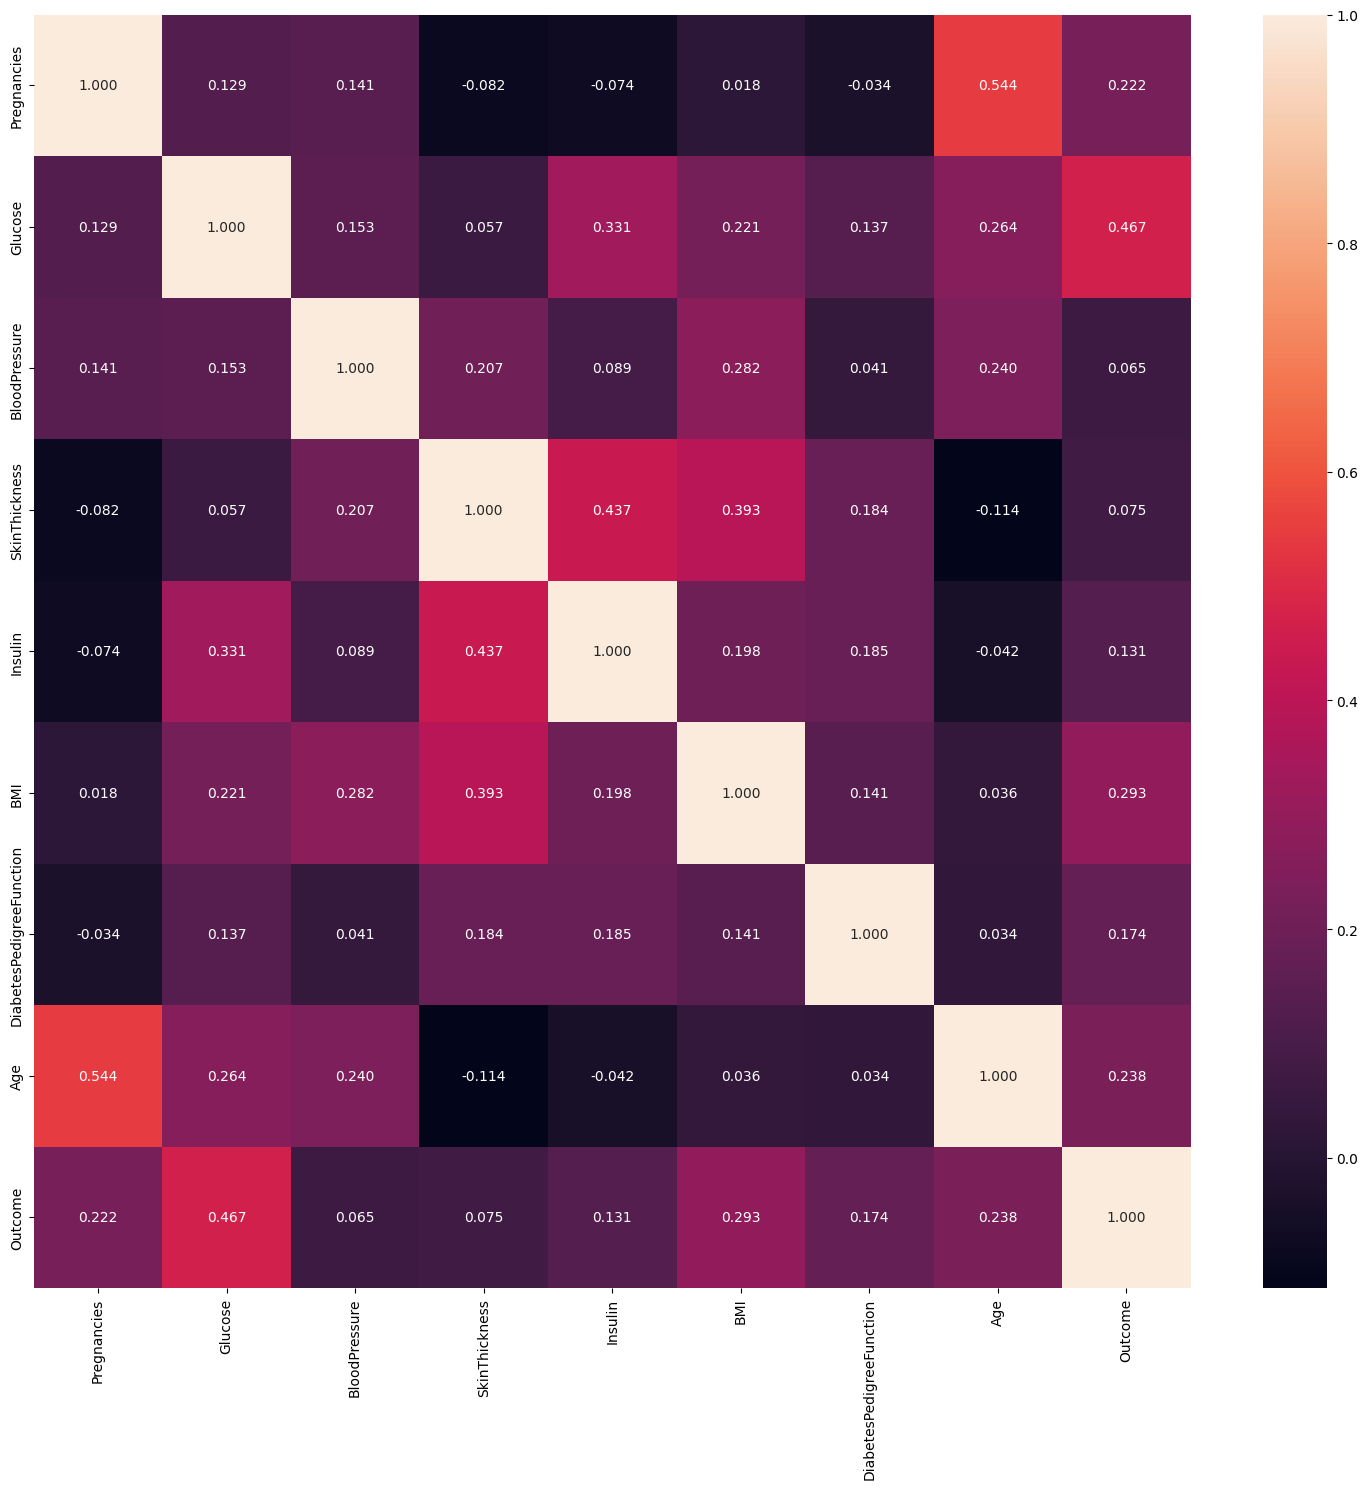

In [7]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".3f")

plt.tight_layout()

# Draw Plot
plt.show()

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


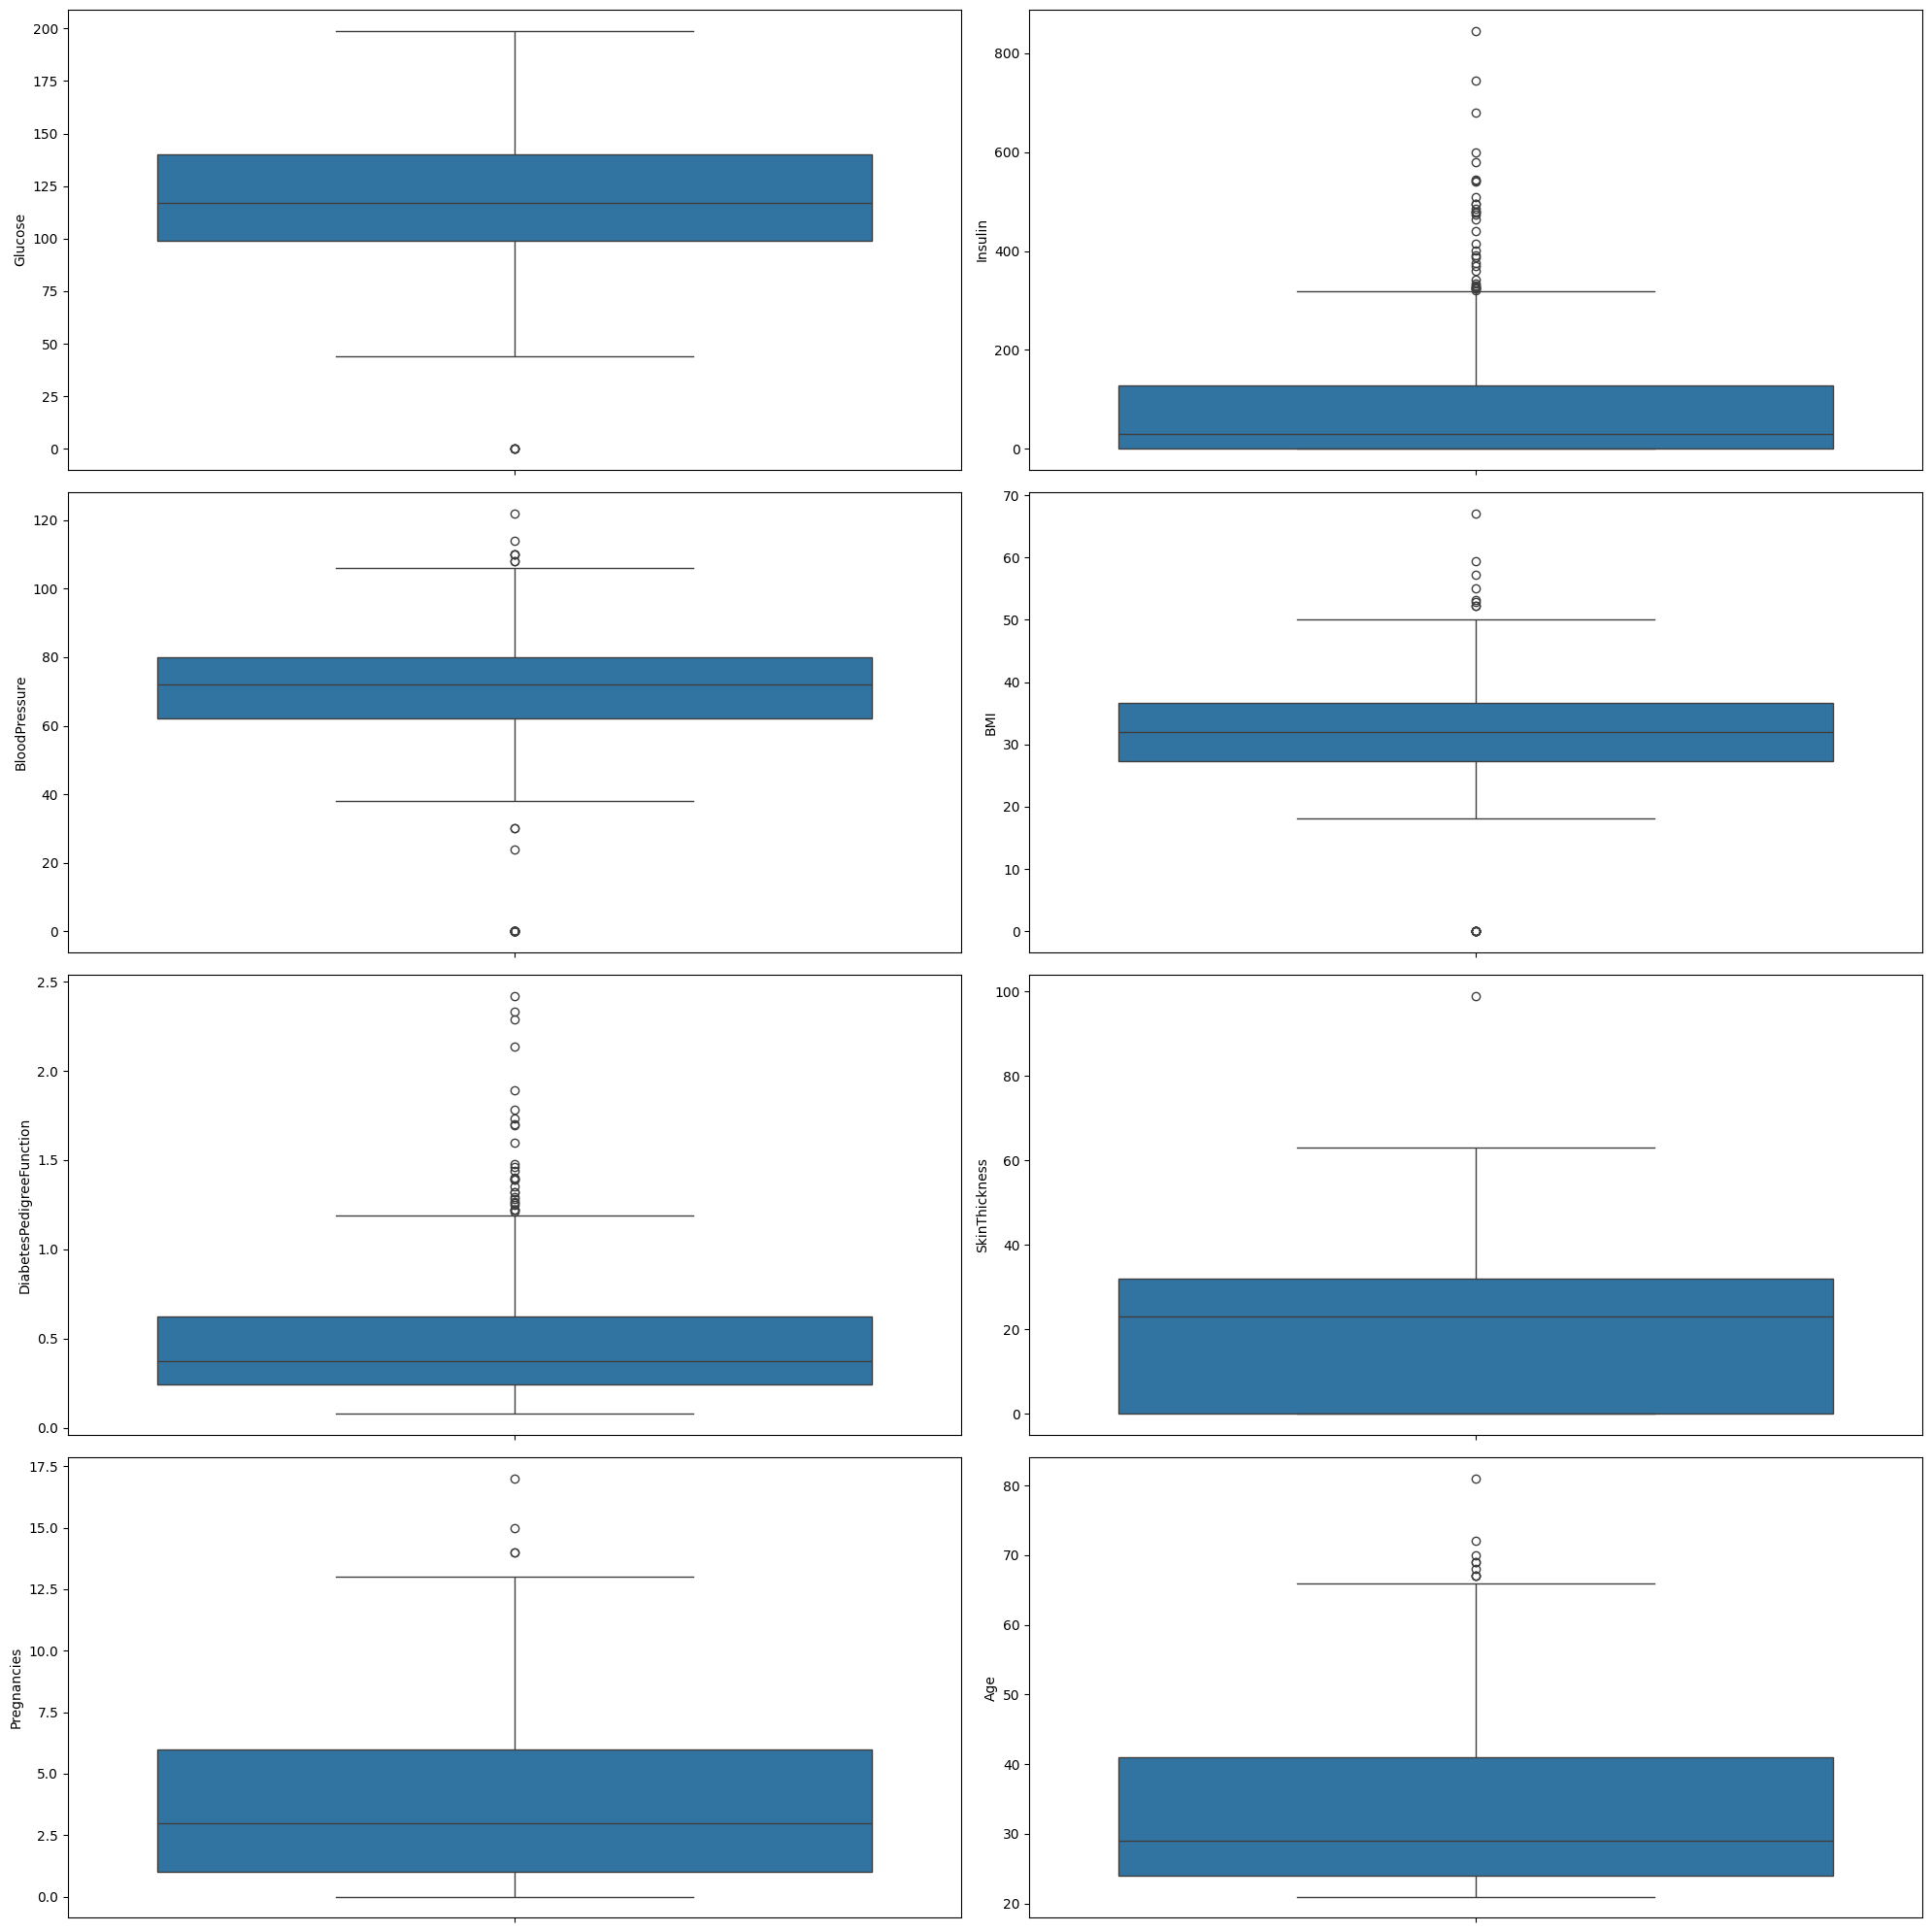

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure
fig, axis = plt.subplots(4, 2, figsize=(20, 20))

# Plot each variable
sns.boxplot(ax=axis[0, 0], data=df, y="Glucose")
sns.boxplot(ax=axis[0, 1], data=df, y="Insulin")
sns.boxplot(ax=axis[1, 0], data=df, y="BloodPressure")
sns.boxplot(ax=axis[1, 1], data=df, y="BMI")
sns.boxplot(ax=axis[2, 0], data=df, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[2, 1], data=df, y="SkinThickness")
sns.boxplot(ax=axis[3, 0], data=df, y="Pregnancies")
sns.boxplot(ax=axis[3, 1], data=df, y="Age")

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
#Glucose outlier

glucose_outlier = df["Glucose"].describe()
glucose_outlier

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [11]:
# Calculate the interquartile range (IQR) for Glucose
glucuse_iqr = glucose_outlier["75%"] - glucose_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = glucose_outlier["75%"] + 1.5 * glucuse_iqr
lower_limit = glucose_outlier["25%"] - 1.5 * glucuse_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(glucuse_iqr, 2)}")


The upper and lower limits for finding outliers are 202.12 and 37.12, with an interquartile range of 41.25


In [12]:
# Clean the outliers

df = df[df["Glucose"] <= 0]

In [13]:
#BloodPressure outlier

BloodPressure_outlier = df["BloodPressure"].describe()
BloodPressure_outlier

count     5.000000
mean     67.600000
std      12.033287
min      48.000000
25%      68.000000
50%      68.000000
75%      74.000000
max      80.000000
Name: BloodPressure, dtype: float64

In [14]:
#Insulin outlier

Insulin_outlier = df["Insulin"].describe()
Insulin_outlier


count     5.000000
mean      4.600000
std      10.285913
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      23.000000
Name: Insulin, dtype: float64

In [15]:
# Calculate the interquartile range (IQR) for Insulin
Insulin_iqr = Insulin_outlier["75%"] - Insulin_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = Insulin_outlier["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_outlier["25%"] - 1.5 * Insulin_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Insulin_iqr, 2)}")


The upper and lower limits for finding outliers are 0.0 and 0.0, with an interquartile range of 0.0


In [16]:
df = df[df["Insulin"] >= 200]

A blood insulin level of 0 micro international units per millilitre (µU/mL) would generally be considered abnormal and could indicate several situations:

- Untreated type 1 diabetes: In type 1 diabetes, the body does not produce insulin, either because the beta cells of the pancreas are destroyed or do not function properly. Therefore, an insulin level of 0 µU/mL could indicate untreated type 1 diabetes.

- Pancreatic insufficiency: In some medical conditions, such as chronic pancreatitis or pancreatic surgery, the pancreas may not produce enough insulin. In these cases, insulin levels may be very low or even undetectable.

- Measurement error: It is possible that an insulin level of 0 µU/mL may be the result of a measurement or assay error.

When seeking to predict whether or not a patient has diabetes, outlier elimination for this variable will be ruled out.

In [26]:
#SkinThickness outlier

SkinThickness_outlier = df["SkinThickness"].describe()
SkinThickness_outlier

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SkinThickness, dtype: float64

In [18]:
# Calculate the interquartile range (IQR) for SkinThickness
SkinThickness_iqr = SkinThickness_outlier["75%"] - SkinThickness_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = SkinThickness_outlier["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_outlier["25%"] - 1.5 * SkinThickness_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(SkinThickness_iqr, 2)}")


The upper and lower limits for finding outliers are nan and nan, with an interquartile range of nan


In [19]:
# Clean the outliers

df = df[(df["SkinThickness"] < 0) & (df["SkinThickness"] > 70)]

In [20]:
#BMI outlier

BMI_outlier = df["BMI"].describe()
BMI_outlier

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: BMI, dtype: float64

In [21]:
# Calculate the interquartile range (IQR) for BMI
BMI_iqr = BMI_outlier["75%"] - BMI_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = BMI_outlier["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_outlier["25%"] - 1.5 * BMI_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BMI_iqr, 2)}")


The upper and lower limits for finding outliers are nan and nan, with an interquartile range of nan


In [24]:

df = df[df["BMI"] > 60]



In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
X_test_sel.head()

In [ ]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("Data/clean_train.csv", index = False)
X_test_sel.to_csv("Data/clean_test.csv", index = False)

#### DECISION TREE ALGORITHM

In [ ]:
train_data = pd.read_csv("Data/clean_train.csv")
test_data = pd.read_csv("Data/clean_test.csv")

train_data.head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#800000","#008000","#FFA500"))

plt.show()